# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from scipy import stats as st



## Load data

In [2]:
user_data = pd.read_csv('/datasets/megaline_users.csv')
call_data = pd.read_csv('/datasets/megaline_calls.csv')
message_data = pd.read_csv('/datasets/megaline_messages.csv')
internet_data = pd.read_csv('/datasets/megaline_internet.csv')
plan_data = pd.read_csv('/datasets/megaline_plans.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
plan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plan_data.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Here we have the dataset for the two different types of plans. Each plan (row) shows the breakdown for whats included in the plan at the given plan cost, as well as, the price per message, price per minute, and price per GB for any additional usage outside of what is covered in the plan. 

Currently, the data shows MB per month included in the plan, with another column stating the price per GB for additonal usage. Since the plan states that the GB included for the month are 15GB for the surf plan, and 30GB for the ultimate plan, we will correct those values and column names so all data is in agreement. 

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plan_data = plan_data.rename(columns={'mb_per_month_included':'gb_per_month_included'})
plan_data.loc[ 0, 'gb_per_month_included'] = 15
plan_data.loc[ 1, 'gb_per_month_included'] = 30
plan_data.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [6]:
user_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
user_data.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [8]:
user_data.tail()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Here we have the dataset for the users. Each user (row) shows the user name, age, location, start date, plan type, and cancelation date. Currently, the user id is a int type and needs to be converted to a string type. Both of the reg_date and churn_date are a string object data type and needs to converted to date time data type.

Currently, there are only 34 non-null values for the churn_date column of 500 total users. The value is currently a string object, and is returning a NaN value for all null values in that column. Once we correct the data type for the churn_date column, we will also fill the null values with 'Active'.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
user_data['user_id'] = user_data['user_id'].astype('str')
user_data['reg_date'] = pd.to_datetime(user_data['reg_date'], errors ='coerce')
user_data['churn_date'] = pd.to_datetime(user_data['churn_date'], errors = 'coerce')
user_data['churn_date'] = user_data['churn_date'].fillna('Active')

user_data.info()
user_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [10]:
user_data['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [11]:
ny_nj_area = user_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'
user_data['region'] = user_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA'

user_data['region'] = np.where(ny_nj_area, 'NY-NJ', 'Other')

In [12]:
user_data['region'].value_counts()

Other    420
NY-NJ     80
Name: region, dtype: int64

In [13]:
user_data['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

In [14]:
user_data


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active,Other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active,Other
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active,Other
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active,Other
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active,Other
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,Active,NY-NJ
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Active,Other
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,Active,Other
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,Active,NY-NJ


## Calls

In [15]:
call_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
call_data.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [17]:
call_data.tail()

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Here we have a dataset reflecting all the calls per user for the year 2018. There are four columns showing the call_id, user_id, call_date, and duration. Currently, the user_id is an int type data and the call_date is an object type. We will fix both values so the call_date is reflected as date tine and the user_id is reflected as a string object. There are no missing values in this data set.

We can also round up the duration of the calls due to Megaline rounding up the call times to the minute.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
call_data['user_id'] = call_data['user_id'].astype('str')
call_data['month'] = pd.to_datetime(call_data['call_date']).dt.to_period('M')

call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype    
---  ------     --------------   -----    
 0   id         137735 non-null  object   
 1   user_id    137735 non-null  object   
 2   call_date  137735 non-null  object   
 3   duration   137735 non-null  float64  
 4   month      137735 non-null  period[M]
dtypes: float64(1), object(3), period[M](1)
memory usage: 5.3+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [19]:
call_data['duration_rounded'] = np.ceil(call_data['duration'])

call_data

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,2018-12,9.0
1,1000_145,1000,2018-12-27,13.66,2018-12,14.0
2,1000_247,1000,2018-12-27,14.48,2018-12,15.0
3,1000_309,1000,2018-12-28,5.76,2018-12,6.0
4,1000_380,1000,2018-12-30,4.22,2018-12,5.0
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018-11,9.0
137731,1499_200,1499,2018-10-20,10.89,2018-10,11.0
137732,1499_201,1499,2018-09-21,8.12,2018-09,9.0
137733,1499_202,1499,2018-10-10,0.37,2018-10,1.0


## Messages

In [20]:
message_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
message_data.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Here we have a dataset reflecting all of the messages sent per user. It consists of four columns; id, user_id, and message_date. Currently, the user_id is an int data type that needs to be converted to a string and the message_date is a string data type that needs to be converted to a date time data type. There are no missing values for this data set. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [22]:
message_data['user_id'] = message_data['user_id'].astype('str')
message_data['message_date'] = pd.to_datetime(message_data['message_date'], errors='coerce')

message_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
message_data['month'] = message_data['message_date'].dt.to_period('M')

message_data

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018-12
76047,1497_536,1497,2018-12-24,2018-12
76048,1497_547,1497,2018-12-31,2018-12
76049,1497_558,1497,2018-12-24,2018-12


## Internet

In [24]:
internet_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
internet_data.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Here we have the data for the internet usage for each customer. It consists of four columns; id, user_id, session_date, and mb_used. Currently, the user_id is in a int data type and must converted to a string data type. The session_date values are currently a string data type and should be converted to a date time data type. Lastly, the mb_used can be converted to a gb_used since Megaline plans calcualte in GB and charge per GB.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [26]:
internet_data['user_id'] = internet_data['user_id'].astype('str')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], errors = 'coerce')

internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [27]:
internet_data['gb_used'] = internet_data['mb_used'] /1000
internet_data['gb_used'] = np.ceil(internet_data['gb_used'])
internet_data['month'] = internet_data['session_date'].dt.to_period('M')

internet_data.head()

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.86,1.0,2018-12
1,1000_204,1000,2018-12-31,0.00,0.0,2018-12
2,1000_379,1000,2018-12-28,660.40,1.0,2018-12
3,1000_413,1000,2018-12-26,270.99,1.0,2018-12
4,1000_442,1000,2018-12-27,880.22,1.0,2018-12


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [28]:
plan_data


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [29]:
monthly_calls = call_data.groupby(['user_id', 'month']).agg(
    call_count=('duration_rounded', 'count'),
    total_minutes=('duration_rounded', 'sum')
).reset_index()
monthly_calls

,user_id,month,call_count,total_minutes
0,1000,2018-12,16,124.0
1,1001,2018-08,27,182.0
2,1001,2018-09,49,315.0
3,1001,2018-10,65,393.0
4,1001,2018-11,64,426.0
...,...,...,...,...
2253,1498,2018-12,39,339.0
2254,1499,2018-09,41,346.0
2255,1499,2018-10,53,385.0
2256,1499,2018-11,45,308.0


In [30]:
monthly_messages = call_data.groupby(['user_id', 'month']).agg(
    total_messages=('id', 'count')
).reset_index()

monthly_messages

,user_id,month,total_messages
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [31]:
monthly_internet = internet_data.groupby(['user_id', 'month']).agg(
    total_gb=('gb_used','sum')
).reset_index()

monthly_internet

,user_id,month,total_gb
0,1000,2018-12,4.0
1,1001,2018-08,21.0
2,1001,2018-09,41.0
3,1001,2018-10,50.0
4,1001,2018-11,49.0
...,...,...,...
2272,1498,2018-12,56.0
2273,1499,2018-09,37.0
2274,1499,2018-10,52.0
2275,1499,2018-11,43.0


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [57]:
merged_data = monthly_calls.merge(monthly_messages, on=['user_id', 'month'], how = 'outer')
monthly_user_data = merged_data.merge(monthly_internet, on=['user_id', 'month'], how = 'outer')
monthly_user_data = monthly_user_data.fillna(0)
monthly_user_data

,user_id,month,total_minutes,total_messages,total_gb
0,1000,2018-12,124.0,16.0,4.0
1,1001,2018-08,182.0,27.0,21.0
2,1001,2018-09,315.0,49.0,41.0
3,1001,2018-10,393.0,65.0,50.0
4,1001,2018-11,426.0,64.0,49.0
...,...,...,...,...,...
2287,1498,2018-12,339.0,39.0,56.0
2288,1499,2018-09,346.0,41.0,37.0
2289,1499,2018-10,385.0,53.0,52.0
2290,1499,2018-11,308.0,45.0,43.0


In [33]:
monthly_user_data = monthly_user_data.merge(user_data[['user_id', 'plan']], on=['user_id'], how = 'outer')


monthly_user_data

,user_id,month,call_count,total_minutes,total_messages,total_gb,plan
0,1000,2018-12,16.0,124.0,16.0,4.0,ultimate
1,1001,2018-08,27.0,182.0,27.0,21.0,surf
2,1001,2018-09,49.0,315.0,49.0,41.0,surf
3,1001,2018-10,65.0,393.0,65.0,50.0,surf
4,1001,2018-11,64.0,426.0,64.0,49.0,surf
...,...,...,...,...,...,...,...
2297,1307,NaT,NaN,NaN,NaN,NaN,surf
2298,1319,NaT,NaN,NaN,NaN,NaN,surf
2299,1378,NaT,NaN,NaN,NaN,NaN,surf
2300,1463,NaT,NaN,NaN,NaN,NaN,ultimate


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [34]:
def revenue_per_user(row):
        plan = row['plan']
        total_minutes = row['total_minutes']
        total_messages = row['total_messages']
        total_gb = row['total_gb']
    
        if plan == 'surf':
            revenue = 20 
            if total_minutes > 500:
                revenue += (total_minutes - 500) * 0.03
            if total_messages > 50:
                revenue += (total_messages - 50) * 0.03
            if total_gb > 15:
                revenue += (total_gb - 15) * 10
            return revenue
        else:
            revenue = 70
            if total_minutes > 3000:
                revenue += (total_minutes - 3000) * 0.01
            if total_messages > 1000:
                revenue += (total_messages - 1000) * 0.01
            if total_gb > 30:
                revenue += (total_gb - 30) * 7
            return revenue


In [35]:
monthly_user_data['monthly_revenue']=monthly_user_data.apply(revenue_per_user, axis =1)

monthly_user_data

,user_id,month,call_count,total_minutes,total_messages,total_gb,plan,monthly_revenue
0,1000,2018-12,16.0,124.0,16.0,4.0,ultimate,70.00
1,1001,2018-08,27.0,182.0,27.0,21.0,surf,80.00
2,1001,2018-09,49.0,315.0,49.0,41.0,surf,280.00
3,1001,2018-10,65.0,393.0,65.0,50.0,surf,370.45
4,1001,2018-11,64.0,426.0,64.0,49.0,surf,360.42
...,...,...,...,...,...,...,...,...
2297,1307,NaT,NaN,NaN,NaN,NaN,surf,20.00
2298,1319,NaT,NaN,NaN,NaN,NaN,surf,20.00
2299,1378,NaT,NaN,NaN,NaN,NaN,surf,20.00
2300,1463,NaT,NaN,NaN,NaN,NaN,ultimate,70.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

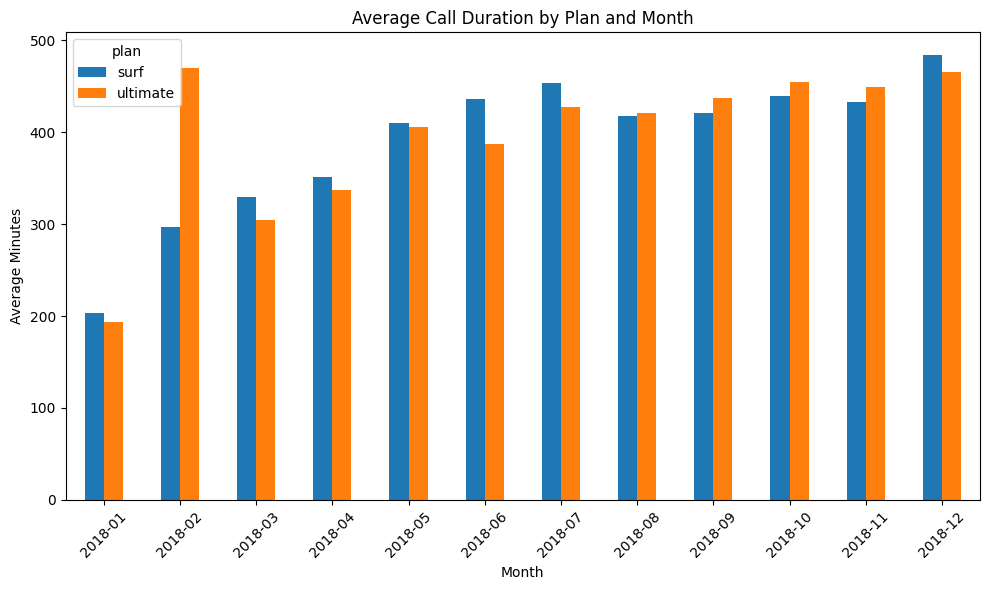

In [36]:
avg_call_time = monthly_user_data.groupby(['month','plan'])['total_minutes'].agg('mean').reset_index()
avg_call_time_data = avg_call_time.pivot(index='month', columns='plan', values='total_minutes')
avg_call_time_data.plot(kind='bar', 
                            figsize=(10, 6), 
                            title = 'Average Call Duration by Plan and Month',
                            xlabel = 'Month',
                           ylabel = 'Average Minutes')
plt.xticks(rotation=45)
plt.tight_layout()



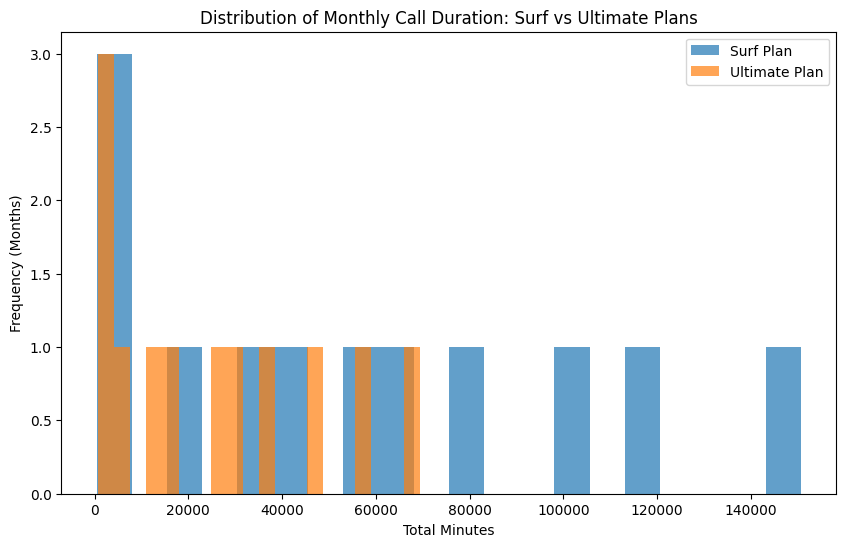

In [37]:
surf_minutes = monthly_user_data[monthly_user_data['plan'] == 'surf'].groupby('month')['total_minutes'].sum()
ultimate_minutes = monthly_user_data[monthly_user_data['plan'] == 'ultimate'].groupby('month')['total_minutes'].sum()

plt.figure(figsize=(10, 6))
plt.hist(surf_minutes, alpha=0.7, label='Surf Plan', bins=20)
plt.hist(ultimate_minutes, alpha=0.7, label='Ultimate Plan', bins=20)
plt.xlabel('Total Minutes')
plt.ylabel('Frequency (Months)')
plt.title('Distribution of Monthly Call Duration: Surf vs Ultimate Plans')
plt.legend()
plt.show()



[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [38]:
monthly_minute_mean_duration = np.mean(monthly_user_data['total_minutes'])
monthly_minute_var_duration = np.var(monthly_user_data['total_minutes'])

print(monthly_minute_mean_duration)
print(monthly_minute_var_duration)

435.9375553587245
53787.33666754012


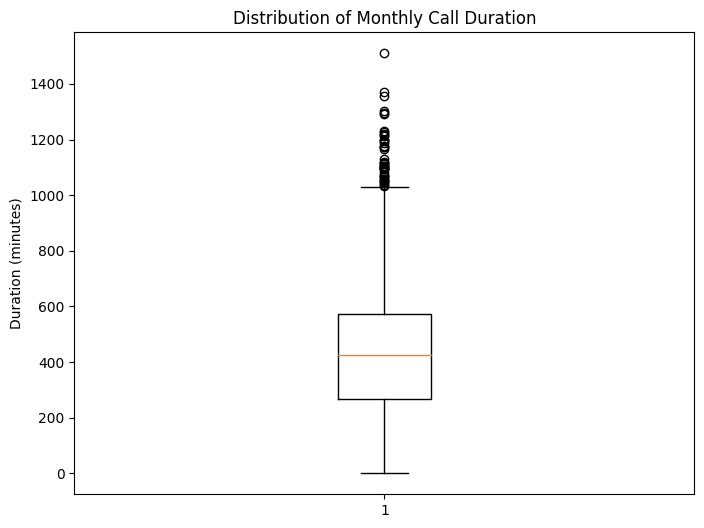

In [39]:
monthly_calls = monthly_user_data.groupby(['user_id', 'month'])['total_minutes'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.boxplot(monthly_calls['total_minutes'])
plt.title('Distribution of Monthly Call Duration')
plt.ylabel('Duration (minutes)')
plt.show()


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

There is a more consistent usage of monthly call duration for the ultimate plan vs the surf plan. Looking at the data, there are more surf plan vs ultimate plan users, resulting in quite a few outliers in data. Most of the surf plan users averaged about 6000-8000 minutes per year, when looking at the histogram. With dubious data showing an oustanding amount of minutes used in off months, possibly suggesting a business user?

### Messages

In [40]:
surf_messages = monthly_user_data[monthly_user_data['plan'] == 'surf'].groupby('month')['total_messages'].sum()
ultimate_messages = monthly_user_data[monthly_user_data['plan'] == 'ultimate'].groupby('month')['total_messages'].sum()


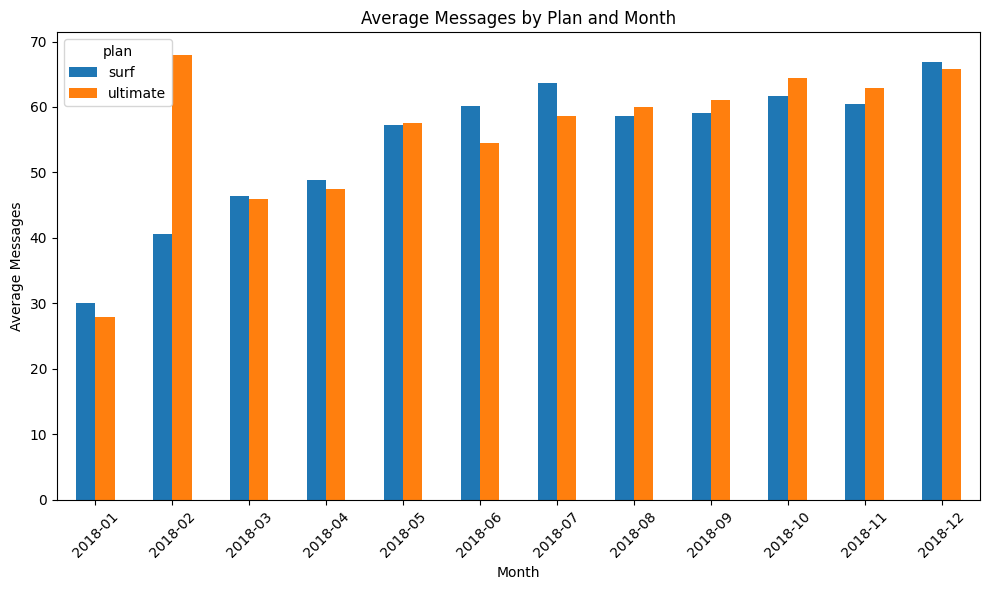

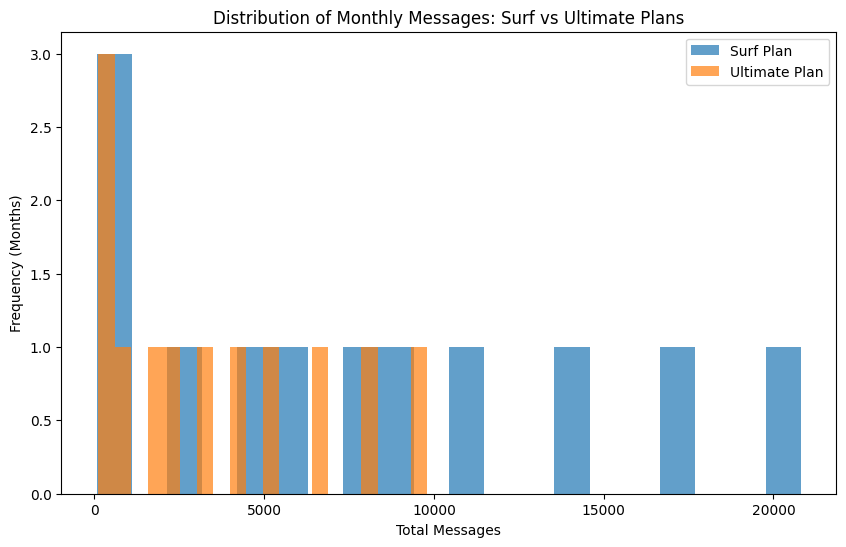

In [41]:
avg_messages = monthly_user_data.groupby(['month','plan'])['total_messages'].agg('mean').reset_index()
avg_messages_data = avg_messages.pivot(index='month', columns='plan', values='total_messages')
avg_messages_data.plot(kind='bar', 
                            figsize=(10, 6), 
                            title = 'Average Messages by Plan and Month',
                            xlabel = 'Month',
                           ylabel = 'Average Messages')
plt.xticks(rotation=45)
plt.tight_layout()


plt.figure(figsize=(10, 6))
plt.hist(surf_messages, alpha=0.7, label='Surf Plan', bins=20)
plt.hist(ultimate_messages, alpha=0.7, label='Ultimate Plan', bins=20)
plt.xlabel('Total Messages')
plt.ylabel('Frequency (Months)')
plt.title('Distribution of Monthly Messages: Surf vs Ultimate Plans')
plt.legend()
plt.show()


In [42]:
monthly_message_mean = np.mean(monthly_user_data['total_messages'])
monthly_message_var = np.var(monthly_user_data['total_messages'])

print(monthly_message_mean)
print(monthly_message_var)

60.99867139061116
1008.9410965518921


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

Most users send very few messages per month, while some users are moderate messagers (around 5,000-10,000 messages/month)and the heavy users can send up to 20,000+ messages per month. Both plans show similar usage patterns, which can be seen in both of the visualizations.

### Internet

In [43]:
surf_gb = monthly_user_data[monthly_user_data['plan'] == 'surf'].groupby('month')['total_gb'].sum()
ultimate_gb = monthly_user_data[monthly_user_data['plan'] == 'ultimate'].groupby('month')['total_gb'].sum()


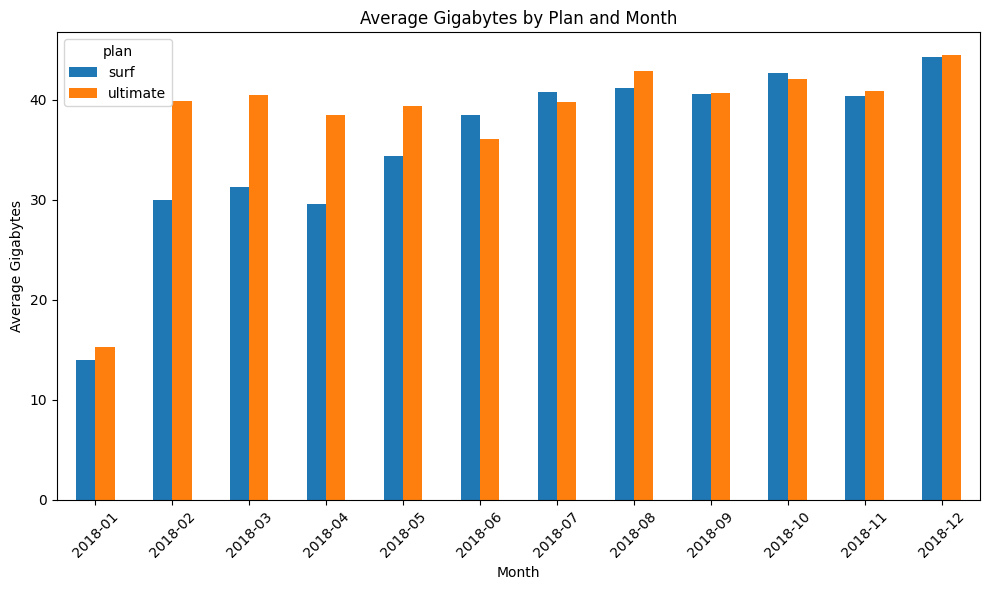

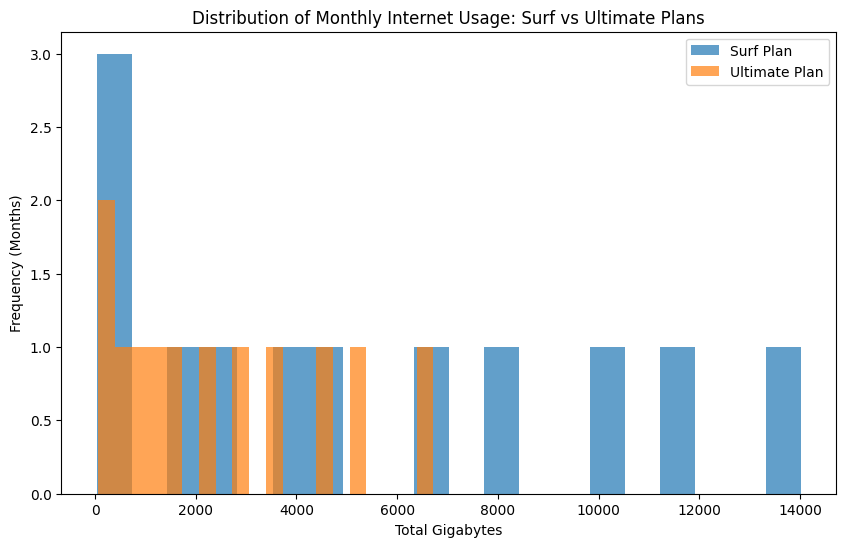

In [44]:
avg_gb = monthly_user_data.groupby(['month','plan'])['total_gb'].agg('mean').reset_index()
avg_gb_data = avg_gb.pivot(index='month', columns='plan', values='total_gb')
avg_gb_data.plot(kind='bar', 
                            figsize=(10, 6), 
                            title = 'Average Gigabytes by Plan and Month',
                            xlabel = 'Month',
                           ylabel = 'Average Gigabytes')
plt.xticks(rotation=45)
plt.tight_layout()


plt.figure(figsize=(10, 6))
plt.hist(surf_gb, alpha=0.7, label='Surf Plan', bins=20)
plt.hist(ultimate_gb, alpha=0.7, label='Ultimate Plan', bins=20)
plt.xlabel('Total Gigabytes')
plt.ylabel('Frequency (Months)')
plt.title('Distribution of Monthly Internet Usage: Surf vs Ultimate Plans')
plt.legend()
plt.show()

In [45]:
monthly_gb_mean = np.mean(monthly_user_data['total_gb'])
monthly_gb_var = np.var(monthly_user_data['total_gb'])

print(monthly_gb_mean)
print(monthly_gb_var)

40.85551163812033
297.12141560339995


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

Here we have a clear plan differentiation: Unlike messaging where both plans looked similar, here we see distinct differences. Ultimate users are heavier internet users: Notice how Ultimate plan users (orange) appear more frequently in the higher usage ranges (3000-5000+ GB), while Surf users cluster at lower usage: Most Surf plan users stay in the 0-2000 GB range


Internet usage is the differentiator between the two plans. While messaging patterns were similar between plans, internet usage shows why people choose different plans. There is an ultimate plan justification where users on Ultimate plans actually do use significantly more data. We see a Plan matching behavior, where people seem to choose plans that match their usage patterns. 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [46]:
monthly_revenue_surf_mean = (monthly_user_data[monthly_user_data['plan'] == 'surf'])['monthly_revenue'].mean()
monthly_revenue_surf_median = (monthly_user_data[monthly_user_data['plan'] == 'surf'])['monthly_revenue'].median()
monthly_revenue_surf_var = (monthly_user_data[monthly_user_data['plan'] == 'surf'])['monthly_revenue'].var()
monthly_revenue_surf_std = (monthly_user_data[monthly_user_data['plan'] == 'surf'])['monthly_revenue'].std()
monthly_revenue_surf_min = (monthly_user_data[monthly_user_data['plan'] == 'surf'])['monthly_revenue'].min()
monthly_revenue_surf_max = (monthly_user_data[monthly_user_data['plan'] == 'surf'])['monthly_revenue'].max()

print(f"""Surf Plan Stats: 
Mean:{monthly_revenue_surf_mean} 
Median:{monthly_revenue_surf_median}
Variance:{monthly_revenue_surf_var}
Standard Deviation:{monthly_revenue_surf_std}
Min. Value:{monthly_revenue_surf_min}
Max Value:{monthly_revenue_surf_max}""")

Surf Plan Stats: 
Mean:282.78626979100693 
Median:290.2
Variance:27113.33178107038
Standard Deviation:164.6612637540183
Min. Value:20.0
Max Value:1210.91


In [47]:
monthly_revenue_ultimate_mean = (monthly_user_data[monthly_user_data['plan'] == 'ultimate'])['monthly_revenue'].mean()
monthly_revenue_ultimate_median = (monthly_user_data[monthly_user_data['plan'] == 'ultimate'])['monthly_revenue'].median()
monthly_revenue_ultimate_var = (monthly_user_data[monthly_user_data['plan'] == 'ultimate'])['monthly_revenue'].var()
monthly_revenue_ultimate_std = (monthly_user_data[monthly_user_data['plan'] == 'ultimate'])['monthly_revenue'].std()
monthly_revenue_ultimate_min = (monthly_user_data[monthly_user_data['plan'] == 'ultimate'])['monthly_revenue'].min()
monthly_revenue_ultimate_max = (monthly_user_data[monthly_user_data['plan'] == 'ultimate'])['monthly_revenue'].max()

print(f"""Ultimate Plan Stats: 
Mean:{monthly_revenue_ultimate_mean}
Median:{monthly_revenue_ultimate_median}
Variance:{monthly_revenue_ultimate_var}
Standard Deviation:{monthly_revenue_ultimate_std}
Min. Value:{monthly_revenue_ultimate_min}
Max Value:{monthly_revenue_ultimate_max}""") 

Ultimate Plan Stats: 
Mean:167.06085753803598
Median:154.0
Variance:7729.511526687434
Standard Deviation:87.9176405887205
Min. Value:70.0
Max Value:532.0


In [48]:
surf_revenue = monthly_user_data[monthly_user_data['plan'] == 'surf'].groupby('month')['monthly_revenue'].sum()
ultimate_revenue = monthly_user_data[monthly_user_data['plan'] == 'ultimate'].groupby('month')['monthly_revenue'].sum()

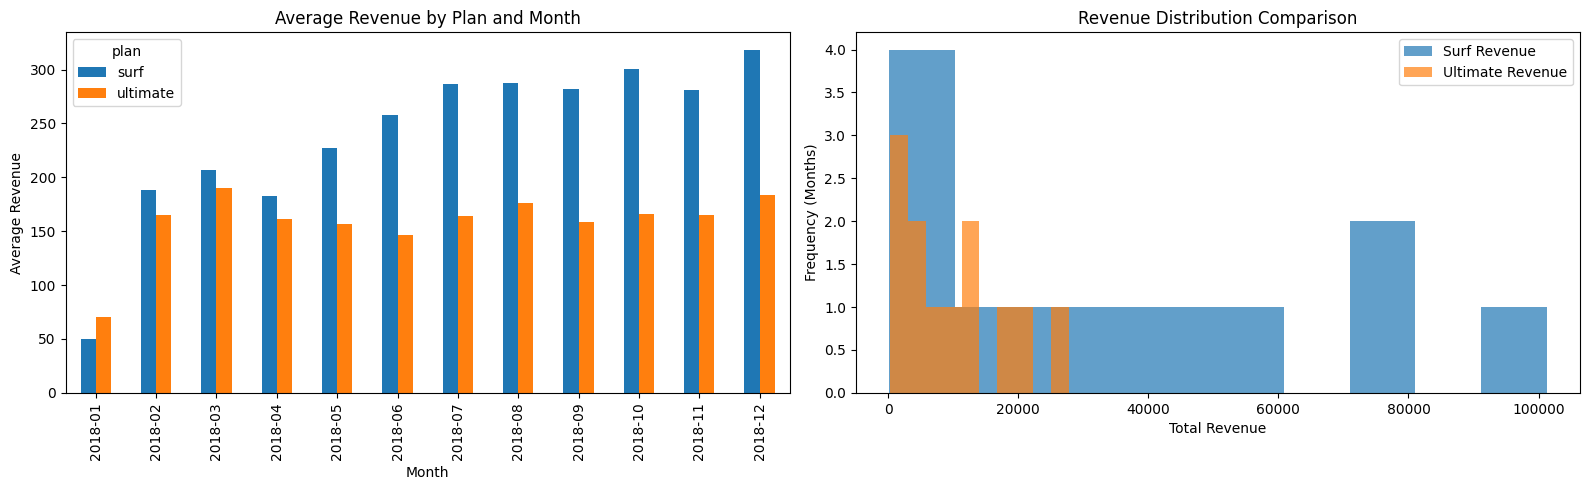

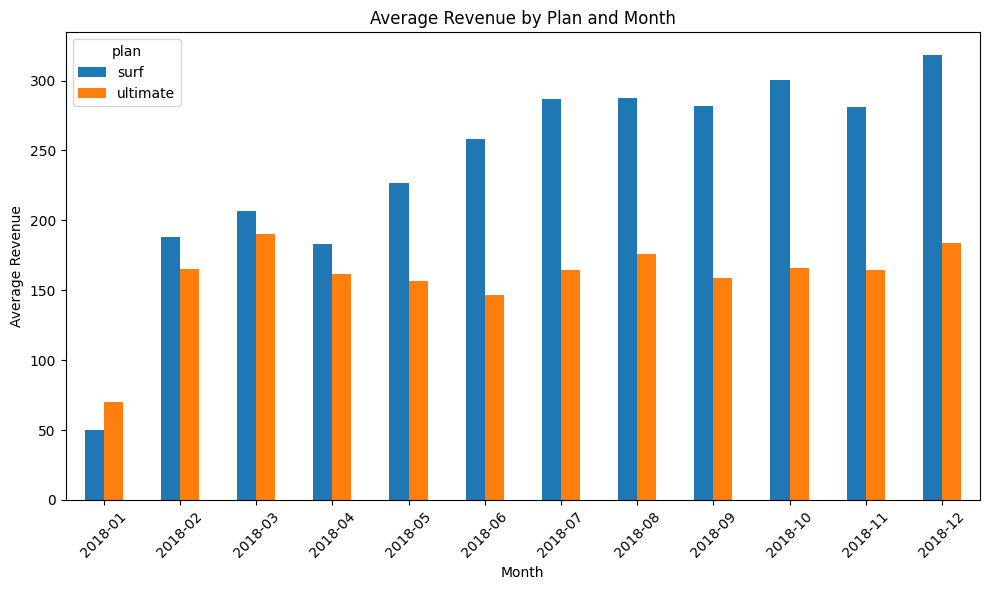

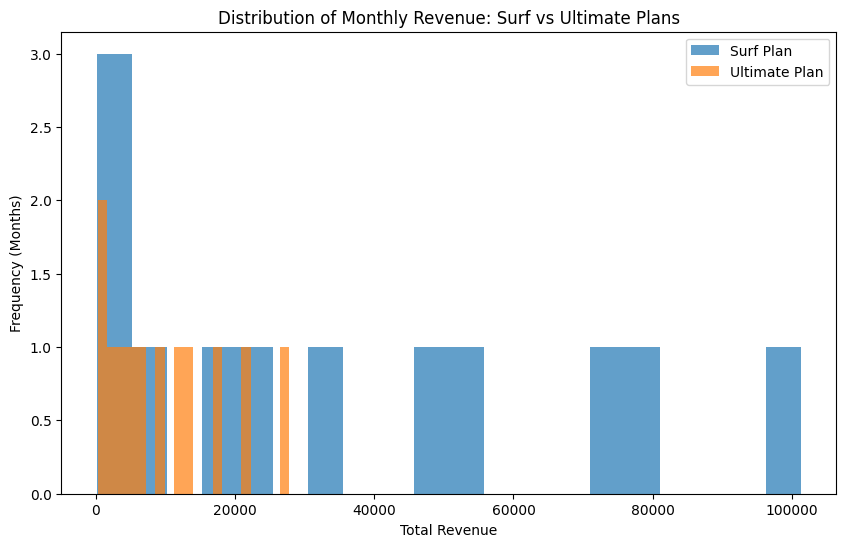

In [49]:
avg_revenue = monthly_user_data.groupby(['month','plan'])['monthly_revenue'].agg('mean').reset_index()
avg_revenue_data = avg_revenue.pivot(index='month', columns='plan', values='monthly_revenue')

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
avg_revenue_data.plot(kind='bar', title='Average Revenue by Plan and Month', ax = axes[0])
surf_revenue.plot(kind='hist', ax=axes[1], label='Surf Revenue', alpha = 0.7)
ultimate_revenue.plot(kind='hist', ax=axes[1], label='Ultimate Revenue', alpha = 0.7)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Revenue')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('Frequency (Months)')
axes[1].set_title('Revenue Distribution Comparison')
axes[1].legend()
plt.tight_layout()
plt.show()


avg_revenue_data.plot(kind='bar', 
                            figsize=(10, 6), 
                            title = 'Average Revenue by Plan and Month',
                            xlabel = 'Month',
                           ylabel = 'Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()


plt.figure(figsize=(10, 6))
plt.hist(surf_revenue, alpha=0.7, label='Surf Plan', bins=20)
plt.hist(ultimate_revenue, alpha=0.7, label='Ultimate Plan', bins=20)
plt.xlabel('Total Revenue')
plt.ylabel('Frequency (Months)')
plt.title('Distribution of Monthly Revenue: Surf vs Ultimate Plans')
plt.legend()
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

Both plans show most users clustered around the lower revenue ranges, however, there's a long tail extending to higher revenue values. This suggests a right-skewed distribution for both plan types. In a plan comparison, the Surf plan (blue) appears to have more users in the very low revenue range, while the Ultimate plan (orange) users seem more evenly distributed across revenue ranges. There are some high-revenue users (15,000-20,000 range) that appear only in the Surf plan.

I am fairly new to coding, and we have not covered seaborn in any of the sprints. I have seen it come up in the live lessons, but there doesn't present to be much information on seaborn.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**H0 (Null Hypothesis):** The average revenue from users of the Ultimate and Surf calling plans are equal.

**H1 (Alternative Hypothesis):** The average revenue from users of the Ultimate and surf calling plans differs

In [50]:
alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject null hypothesis')
else:
    print('We cannot reject null hypothesis')


p-value: 0.018620907339472612
We reject null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**H0 (Null Hypothesis):** The average revenue from the users in the NY-NJ area is equal to that of users from other regions.

**H1 (Alternative Hypothesis):** The average revenue from the users in the NY-NJ area is different to that of users from other regions.

In [51]:
monthly_user_data = monthly_user_data.merge(user_data[['user_id', 'region']], on=['user_id'])
monthly_user_data


,user_id,month,call_count,total_minutes,total_messages,total_gb,plan,monthly_revenue,region
0,1000,2018-12,16.0,124.0,16.0,4.0,ultimate,70.00,Other
1,1001,2018-08,27.0,182.0,27.0,21.0,surf,80.00,Other
2,1001,2018-09,49.0,315.0,49.0,41.0,surf,280.00,Other
3,1001,2018-10,65.0,393.0,65.0,50.0,surf,370.45,Other
4,1001,2018-11,64.0,426.0,64.0,49.0,surf,360.42,Other
...,...,...,...,...,...,...,...,...,...
2297,1307,NaT,NaN,NaN,NaN,NaN,surf,20.00,Other
2298,1319,NaT,NaN,NaN,NaN,NaN,surf,20.00,Other
2299,1378,NaT,NaN,NaN,NaN,NaN,surf,20.00,Other
2300,1463,NaT,NaN,NaN,NaN,NaN,ultimate,70.00,Other


In [52]:
ny_nj_revenue = monthly_user_data[monthly_user_data['region'] == 'NY-NJ'].groupby('month')['monthly_revenue'].sum()
other_revenue = monthly_user_data[monthly_user_data['region'] == 'Other'].groupby('month')['monthly_revenue'].sum()

alpha = 0.05
results = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject null hypothesis')
else:
    print('We cannot reject null hypothesis')


p-value: 0.01441026089753485
We reject null hypothesis


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

FINAL CONCLUSIONS:

The Surf plan generates more revenue for Megaline from its clients. Overall, users pick a plan according to data usage. Because the ultimate plan offers more data, more minutes, and more messaging per month in the plan value, the most usage falls into this monthly plan. Whereas, the surf plan presents significanlty cheaper to someone who may not see data usage as necessity, however, they pay inadditional fees for overusage due to plan restraints. There also was significantly more surf plan users (339) in comparison to ultimate plan users(161). Which can also skew the data to the right. This may indicate perhaps some surf plan users might be business oriented. When we tested our hypothesis for the average revenue of each plan from users, we used an statistical significance of 0.05, and our p-value resulted in 0.018, which is about 1.8%. Therefore, we reject the null hypothesis. 

There is also a difference in the average revenue of users from NY-NJ area in compared to users in other regions. The amount of data shows that though there is less users in NY-NJ (80) in comparison to the rest of the users (420), huge difference in the population being tested . When we tested our hypothesis, we set our statistical significance to 0.05 and our p-value resulted in 0.014, which is about 1.4%. Therefore, we can reject the null hypothesis.  


CALL DATA:

There is a more consistent usage of monthly call duration for the ultimate plan vs the surf plan. Looking at the data, there are more surf plan vs ultimate plan users, resulting in quite a few outliers in data. Most of the surf plan users averaged about 6000-8000 minutes per year, when looking at the histogram. With dubious data showing an oustanding amount of minutes used in off months, possibly suggesting a business user?

MESSAGE DATA:

Most users send very few messages per month, while some users are moderate messagers (around 5,000-10,000 messages/month)and the heavy users can send up to 20,000+ messages per month. Both plans show similar usage patterns, which can be seen in both of the visualizations.

INTERNET DATA:

Here we have a clear plan differentiation: Unlike messaging where both plans looked similar, here we see distinct differences. Ultimate users are heavier internet users, the ultimate users appear more frequently in the higher usage ranges (3000-5000+ GB), while Surf users cluster at lower usage staying in the 0-2000 GB range

Internet usage is the differentiator between the two plans. While messaging patterns were similar between plans, internet usage shows why people choose different plans. There is an ultimate plan justification where users on Ultimate plans actually do use significantly more data. We see a plan matching behavior, where people seem to choose plans that match their usage patterns. 

REVENUE DATA:

Both plans show most users clustered around the lower revenue ranges, however, there's a long tail extending to higher revenue values. This suggests a right-skewed distribution for both plan types. In a plan comparison, the Surf plan (blue) appears to have more users in the very low revenue range, while the Ultimate plan (orange) users seem more evenly distributed across revenue ranges. There are some high-revenue users (15,000-20,000 range) that appear only in the Surf plan. This shows that we cannot reject the null hypothesis.

RECOMMENDATIONS:

Megaline should advertise the Surf Plan price, and possibly create a marketing target for businesses. Marketing for the Surf plan can also target for possibly an older demographic where internet or messaging isn't necessarily essential in every day life. Most elderly prefer voice communication, and you would be able to capitalize on revenue from additional minutes used on talking on the phone. 

 Thank you for your feedback!
